# Open Rice

** 1.) ** We scrapped a data set from open rice but it needs cleaning:

* Remove duplicate data
* Use a regex to clean the review col
* Remove the trailing commar from the adress col


In [22]:
import pandas as pd

In [201]:
openrice = pd.read_csv("data/open-rice.csv")

In [202]:
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,(133 Reviews),Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,(30 Reviews),$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,(43 Reviews),$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,(39 Reviews),Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,(57 Reviews),$51-100


In [203]:
openrice.shape

(26165, 8)

In [204]:
openrice['address'].describe()

count                                                 26165
unique                                                14693
top       Level L, Cordis, Hong Kong at Langham Place, 5...
freq                                                     29
Name: address, dtype: object

### Remove duplicate data


In [205]:
openrice=openrice.drop_duplicates(subset=["address","name"])

In [206]:
openrice.shape

(15086, 8)

### Clean the review col

In [207]:
import re

In [208]:
def splitit(text):
    return (re.findall("\d+",text))

In [209]:
x=openrice["number_of_reviews"].apply(splitit)
y=[]
for i in x:
    y.extend(i) 

In [210]:
openrice["number_of_reviews"]=y
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,43,$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100


### Remove the trailing commar from the adress col

In [211]:
def removecol(text):
    if text[-1]==",":
        s=text[:-1]
    else:
        s=text
    return (s)

In [212]:
openrice["address"]=openrice["address"].apply(removecol)
openrice.head(5)

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50
1,"G/F, 108 Hollywood Road",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400
2,"G/F, 206 Hollywood Road",5517,5,Thai,31,Chachawan,43,$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50
4,"G/F, 38 Queens Road West",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100


** 2.) ** Which resturant in Hong Kong is the most favorable? In terms of likes, in terms of bookmarks?

In [213]:
openrice.sort_values(by="likes",ascending=[False]).head(5)

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
569,"G/F, 47-49 Parkes Street",35511,267,Hong Kong Style,1585,Australia Dairy Company 澳洲牛奶公司,2595,Below $50
243,2 Mei Lun Street,38286,76,Hong Kong Style,929,Sing Heung Yuen 勝香園,1309,Below $50
13284,"Shop D, G/F, Food Street, 50-56 Paterson Stree...",34590,54,American,725,Burgeroom,906,$51-100
11501,"G/F, 62 & 67 Fuk Wing Street / Shop D, G/F, 16...",15785,88,Hong Kong Style,650,Wai Kee Noodle Cafe 維記咖啡粉麵,1045,Below $50
491,"Shop 23, UG, Festival Walk, 80 Tat Chee Avenue",6492,53,Yoshoku,642,EXP,956,$101-200


In [214]:
openrice.sort_values(by="bookmarks",ascending=[False]).head(5)

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
233,"Level L, Cordis, Hong Kong at Langham Place, 5...",43087,67,International,210,The Place,422,$401-800
13298,"Shop 1-2, G/F, Kiu Fung Mansion, 83-89 Kimberl...",40506,23,Western,367,LAB EAT Restaurant & Bar,467,$201-400
243,2 Mei Lun Street,38286,76,Hong Kong Style,929,Sing Heung Yuen 勝香園,1309,Below $50
569,"G/F, 47-49 Parkes Street",35511,267,Hong Kong Style,1585,Australia Dairy Company 澳洲牛奶公司,2595,Below $50
6265,"3/F, The Royal Garden, 69 Mody Road",35001,77,Western,502,The Greenery 雅苑座,757,$401-800


** 3.) ** What is the price range for the whole open rice dataset?

In [215]:
openrice["price_range"].unique()

array(['Below $50', '$201-400', '$51-100', '$101-200', '$401-800',
       'Above $801'], dtype=object)

** 4.) ** By grouping price_range with mean and median, what can you observe from bookmarks and likes?


In [216]:
openrice.groupby("price_range").mean(),openrice.groupby("price_range").median()

(               bookmarks  dislikes      likes
 price_range                                  
 $101-200     1881.684495  5.779051  43.188793
 $201-400     3067.668576  7.120974  60.073729
 $401-800     4141.452012  7.588235  56.801858
 $51-100      1050.693061  4.310017  27.080862
 Above $801   3774.645833  4.270833  54.020833
 Below $50     512.222731  2.779558  15.779558,
              bookmarks  dislikes  likes
 price_range                            
 $101-200         705.0       3.0   19.0
 $201-400        1596.0       3.0   32.0
 $401-800        2266.0       3.0   35.0
 $51-100          269.0       1.0   10.0
 Above $801      2768.5       2.0   22.5
 Below $50         82.0       1.0    5.0)

There's to many resturants types, this can hinder the analysis. Lets make a new column for HK Style Resturants.

In [217]:
def hkstyle_to_numeric(x):
    if x in ['Hong Kong Style','Dai Pai Dong','Dim Sum Restaurant','Noodles/Rice Noodles']:
        return "HKresturant"
    else:
        return "Non-HKresturant"


In [218]:
# we can use .apply to generate new columns for it
openrice['HKresturant'] = openrice['food_type'].apply(hkstyle_to_numeric)  

In [219]:
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range,HKresturant
0,"Shop J-K., 200 Hollywood Road",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50,HKresturant
1,"G/F, 108 Hollywood Road",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400,Non-HKresturant
2,"G/F, 206 Hollywood Road",5517,5,Thai,31,Chachawan,43,$201-400,Non-HKresturant
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50,HKresturant
4,"G/F, 38 Queens Road West",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100,Non-HKresturant


** 5.) ** Select price_range, likes, bookmarks,  HKresturant as a new dataframe 

In [220]:
openrice2 = openrice[["price_range","likes","bookmarks","HKresturant"]]

** 6.) ** Use your new dataframe make box plot and violin plots

In [221]:
import seaborn as sns
%matplotlib inline

In [222]:
#Should look something like this

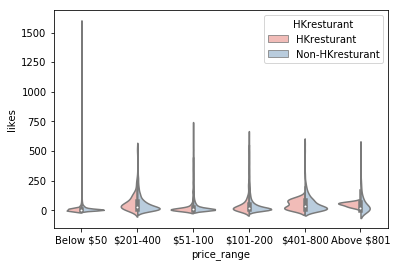

In [254]:
sns.violinplot(y='likes', x='price_range',hue="HKresturant", data=openrice2, palette="Pastel1",split=True)

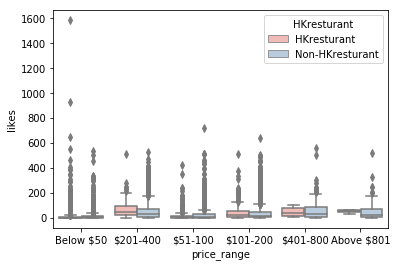

In [253]:
sns.boxplot(y='likes', x='price_range',hue="HKresturant", data=openrice2, palette="Pastel1")

# Unicef Data

When working with data we may aberiviate the columns names to make them simpler to type. However we need to be anle to change them back 


In [97]:
import pandas as pd

In [98]:
df = pd.read_csv("https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/unicef/mn.csv", low_memory=False)

In [99]:
df.head()

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,17,1,1,17,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,2,1,20,1,1,20,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,3,2,1,1,2,1,1,9,8,4,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,4,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,5,2,1,8,2,1,8,9,8,4,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


 ** 1.) ** Drop the unnamed column

In [100]:
[col for col in df.columns if 'name' in col]

['Unnamed: 0']

In [101]:
del df["Unnamed: 0"]

** 2.) ** Use the data in `header_df` to replace the `Name` with it's `Label` in the original dataframe.

In [102]:
header_df = pd.read_csv("https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/unicef/mn_headers.csv")

In [103]:
header_df.head()

,Name,Label,Question
0,HH1,Cluster number,NaN
1,HH2,Household number,NaN
2,LN,Line number,NaN
3,MWM1,Cluster number,NaN
4,MWM2,Household number,NaN


In [104]:
df.head(3)

,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,MWM6Y,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


In [214]:
colint=[]
colnam=[]
for i in df.columns:
    colint.append(i) 
    colnam.append(str(header_df.loc[header_df["Name"]==i,"Label"].values).strip(r"']\[\" "))

In [219]:
df.columns=colnam
df.head(3)

,Cluster number,Household number,Line number,Cluster number,Household number,Man's line number,Interviewer number,Day of interview,Month of interview,Year of interview,...,Children surviving,Children dead,,,Wealth index score,Wealth index quintiles,,,,
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


# Ricacorp

** 1.) ** Reading in the file. *Hint*  Which type of format it is? Also you'll need to change the encoding to 'utf-16'

In [247]:
import codecs
import io

In [286]:
rica=pd.read_table("data/ricacorp-real-estate-sales.tsv",encoding="utf-16")
rica.head()

,Area,web-scraper-order,web-scraper-start-url,pagination,pagination-href,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,1521007907-3932,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,null,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,1521007147-2665,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,1521006995-2269,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,1521008121-4522,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,null,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,1521006897-2016,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,null,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M


In [287]:
rica.shape

(10009, 15)

** 2.) ** Remove the useless columns like web-scraper-order, pagination etc.

In [288]:
rica=rica.drop(["web-scraper-start-url","pagination","pagination-href"],axis=1)
rica.head()

,Area,web-scraper-order,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,1521007907-3932,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,null,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,1521007147-2665,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,1521006995-2269,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,1521008121-4522,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,null,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,1521006897-2016,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,null,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M
